In [417]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split

In [179]:
df =pd.read_csv('/Users/monikaju/Desktop/bike-sharing-demand/train.csv', parse_dates=True)

### Undestanding the data

In [180]:
df.shape

(10886, 12)

In [181]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [121]:
df.shape

(10886, 12)

In [177]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,month,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,9.992559,6.521495,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,5.476608,3.444373,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,5.000000,4.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,10.000000,7.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,15.000000,10.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,19.000000,12.000000,23.000000


In [182]:
df[('datetime')]=pd.to_datetime(df['datetime'])

In [185]:
indexedDataset = df.set_index(['datetime'])

In [288]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour,month
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,1
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,1


### Adding year, day, month, hours and daytime 

In [186]:
df['year']=df.datetime.dt.year

In [189]:
df['day']=df.datetime.dt.day

In [194]:
df['month']=df.datetime.dt.month

In [193]:
df['hour']=df.datetime.dt.hour

In [286]:
df['datetime']=df.datetime.dt.date

In [287]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour,month
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,1
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,1


### Exploratory Analisis

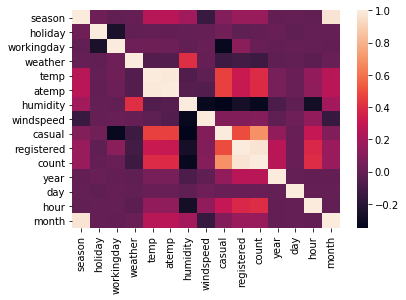

In [404]:
sns.heatmap(df.corr())

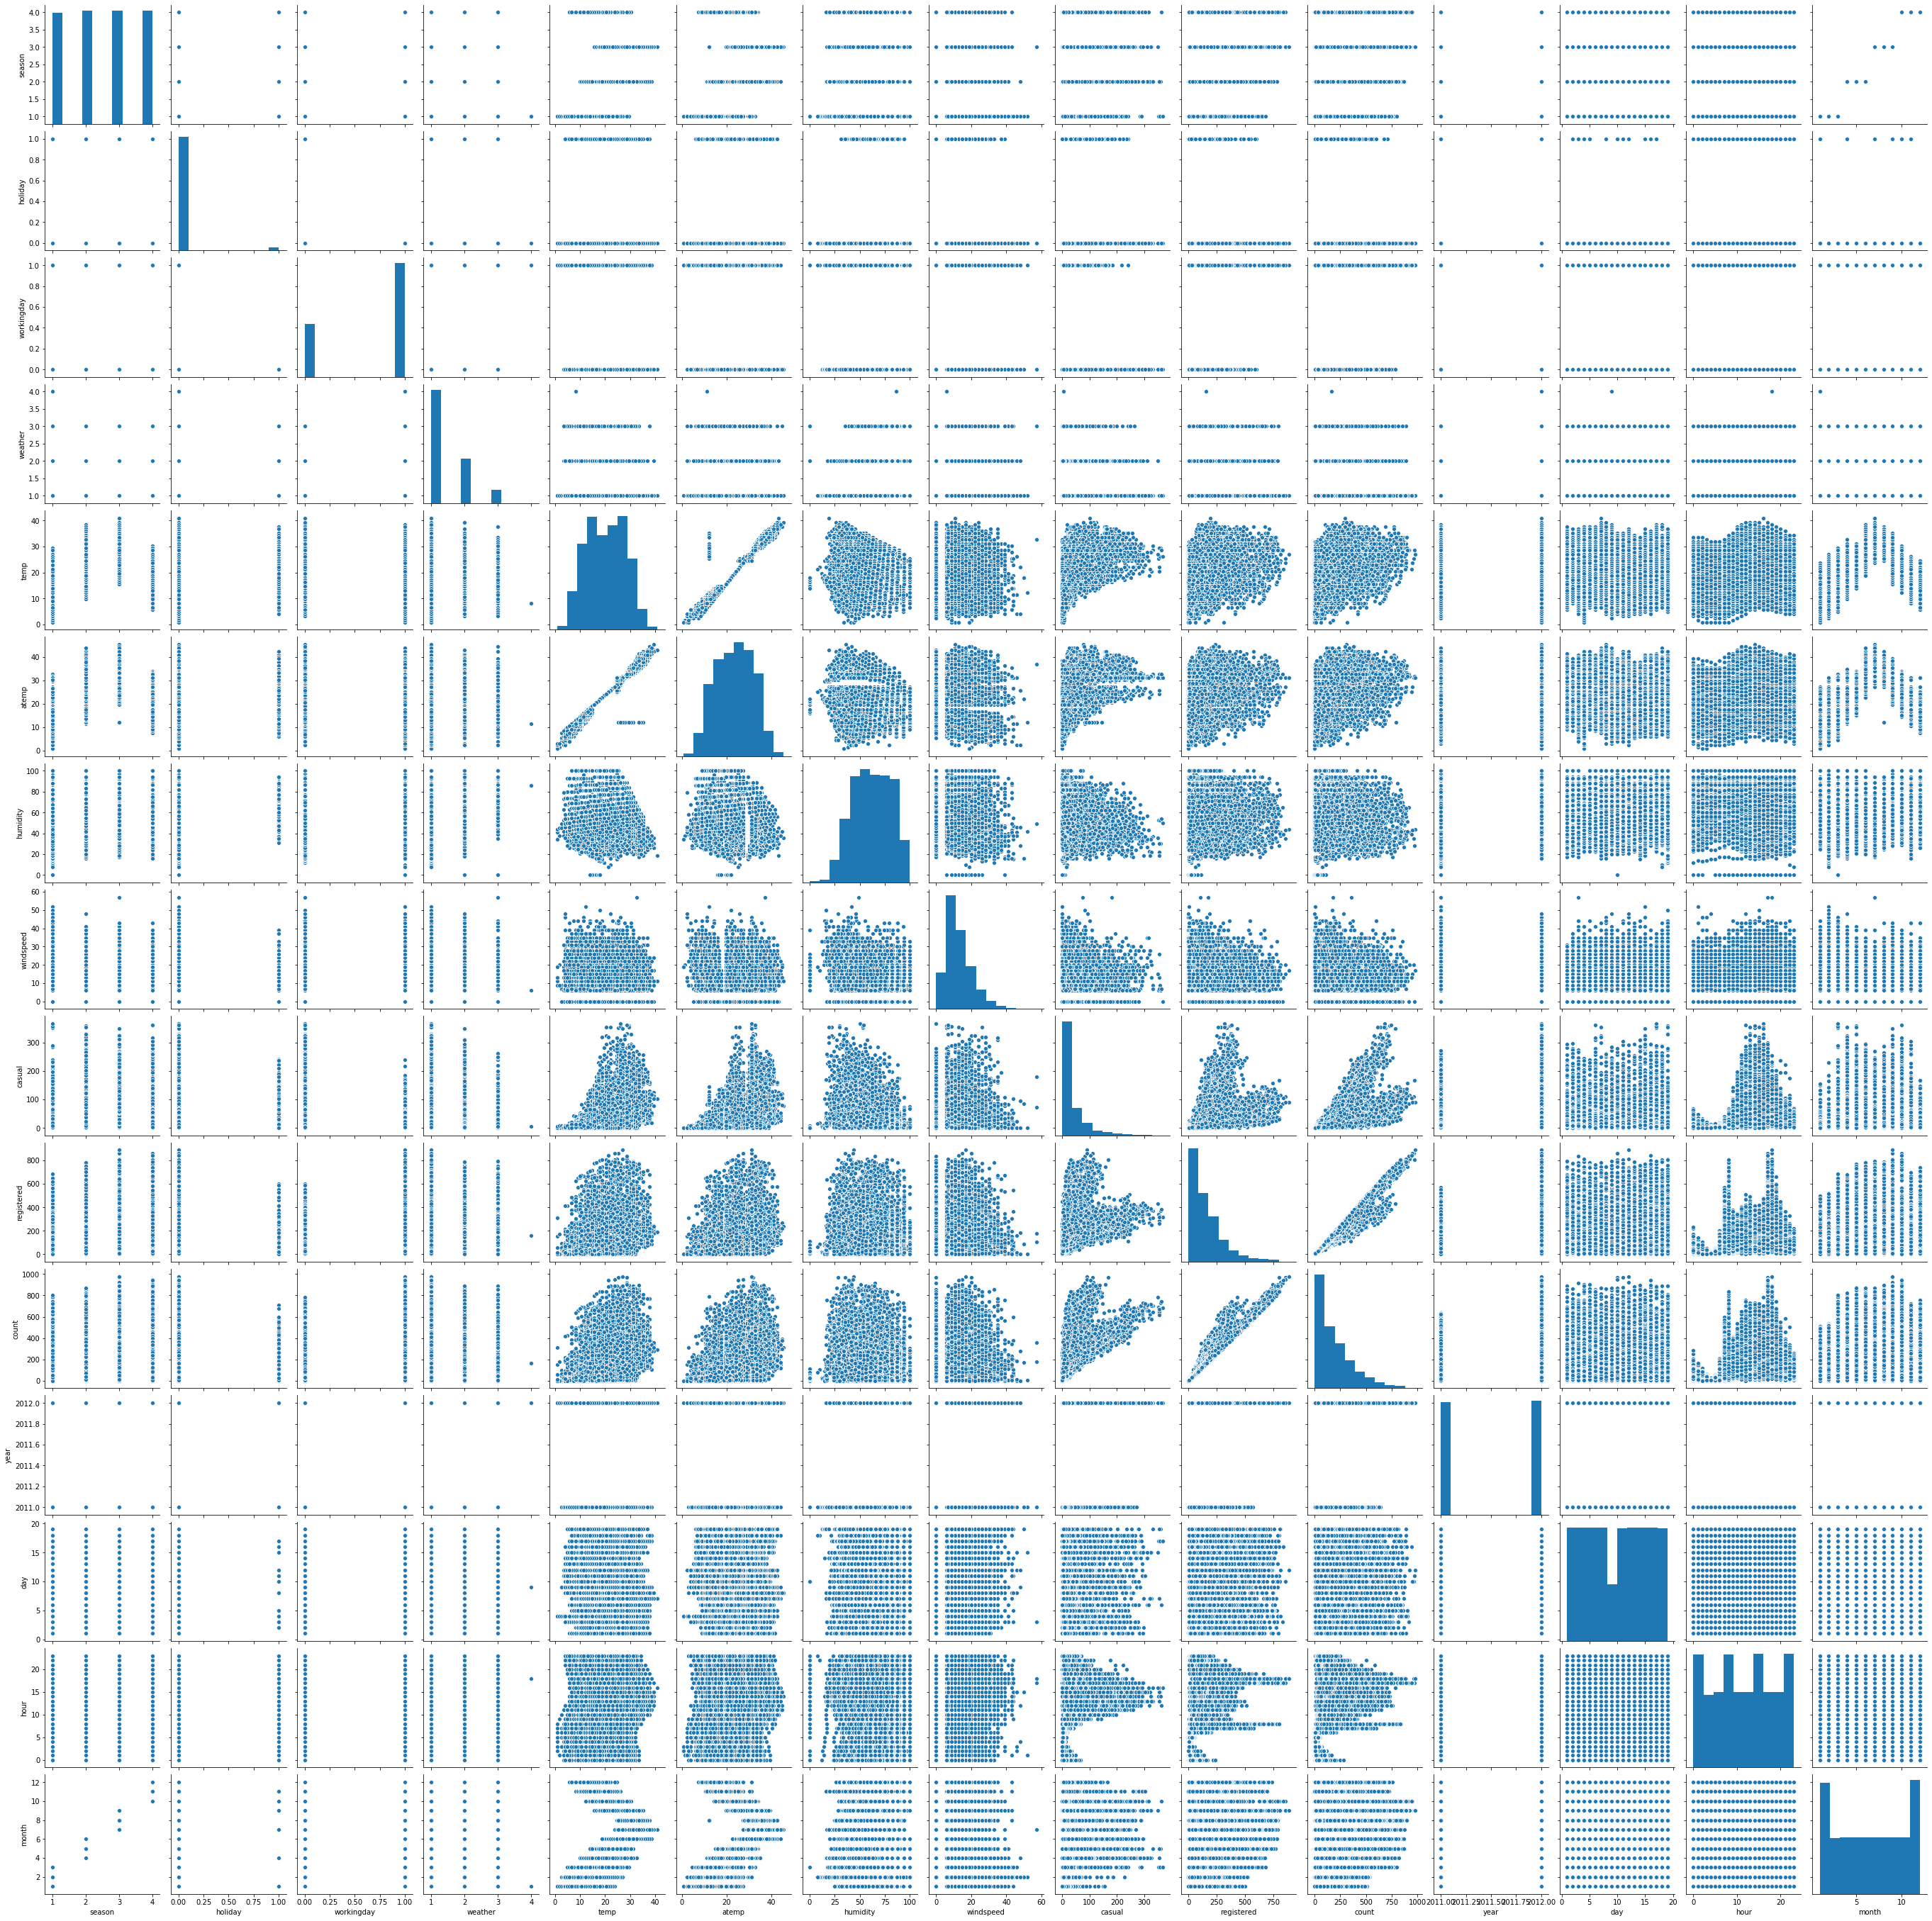

In [267]:
sns.pairplot(df)

In [405]:
df.corr()[['count']].   
# Conts correlate mostly with: Register, Casual, Hour, Temp, atemp, humidity, month

,count
season,0.163439
holiday,-0.005393
workingday,0.011594
weather,-0.128655
temp,0.394454
atemp,0.389784
humidity,-0.317371
windspeed,0.101369
casual,0.690414
registered,0.970948


### Which factors contribute most to the number of bicycles being checkout out over the course of a given day?

In [204]:
df2 = df.groupby('hour').mean()

In [219]:
df2.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,month
hour,,,,,,,,,,,,,,
0,2.503297,0.028571,0.681319,1.393407,19.013187,22.462582,68.079121,10.701564,10.312088,44.826374,55.138462,2011.501099,9.982418,6.512088
1,2.502203,0.028634,0.680617,1.431718,18.639648,22.011476,69.581498,10.418839,6.513216,27.345815,33.859031,2011.502203,9.991189,6.506608
2,2.522321,0.029018,0.680804,1.401786,18.455491,21.822623,70.622768,10.125315,4.819196,18.080357,22.899554,2011.506696,9.973214,6.560268


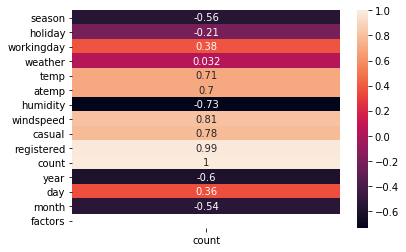

In [235]:
# Transform into a data frame

df3 =df2.corr()[['count']]
sns.heatmap(df3, annot=True)

In [236]:
df3

,count
season,-0.556510
holiday,-0.206767
workingday,0.382709
weather,0.031639
temp,0.705949
atemp,0.697798
humidity,-0.734361
windspeed,0.812718
casual,0.778263
registered,0.987088


#### The factors that seem to contribute the most to the checkout of bikes in a day are: registered, windspeed, Casual.

In [383]:
df2.head()
df2.reset_index(inplace=True)

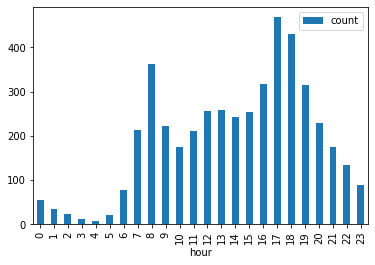

In [386]:
df2.plot.bar(x='hour',y='count')

### The hours with greater trafic (AVG) are 16:19

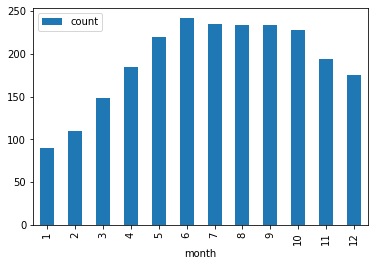

In [393]:
df2 = df.groupby('month').mean()
df2.reset_index(inplace=True)
df2.plot.bar(x='month',y='count')


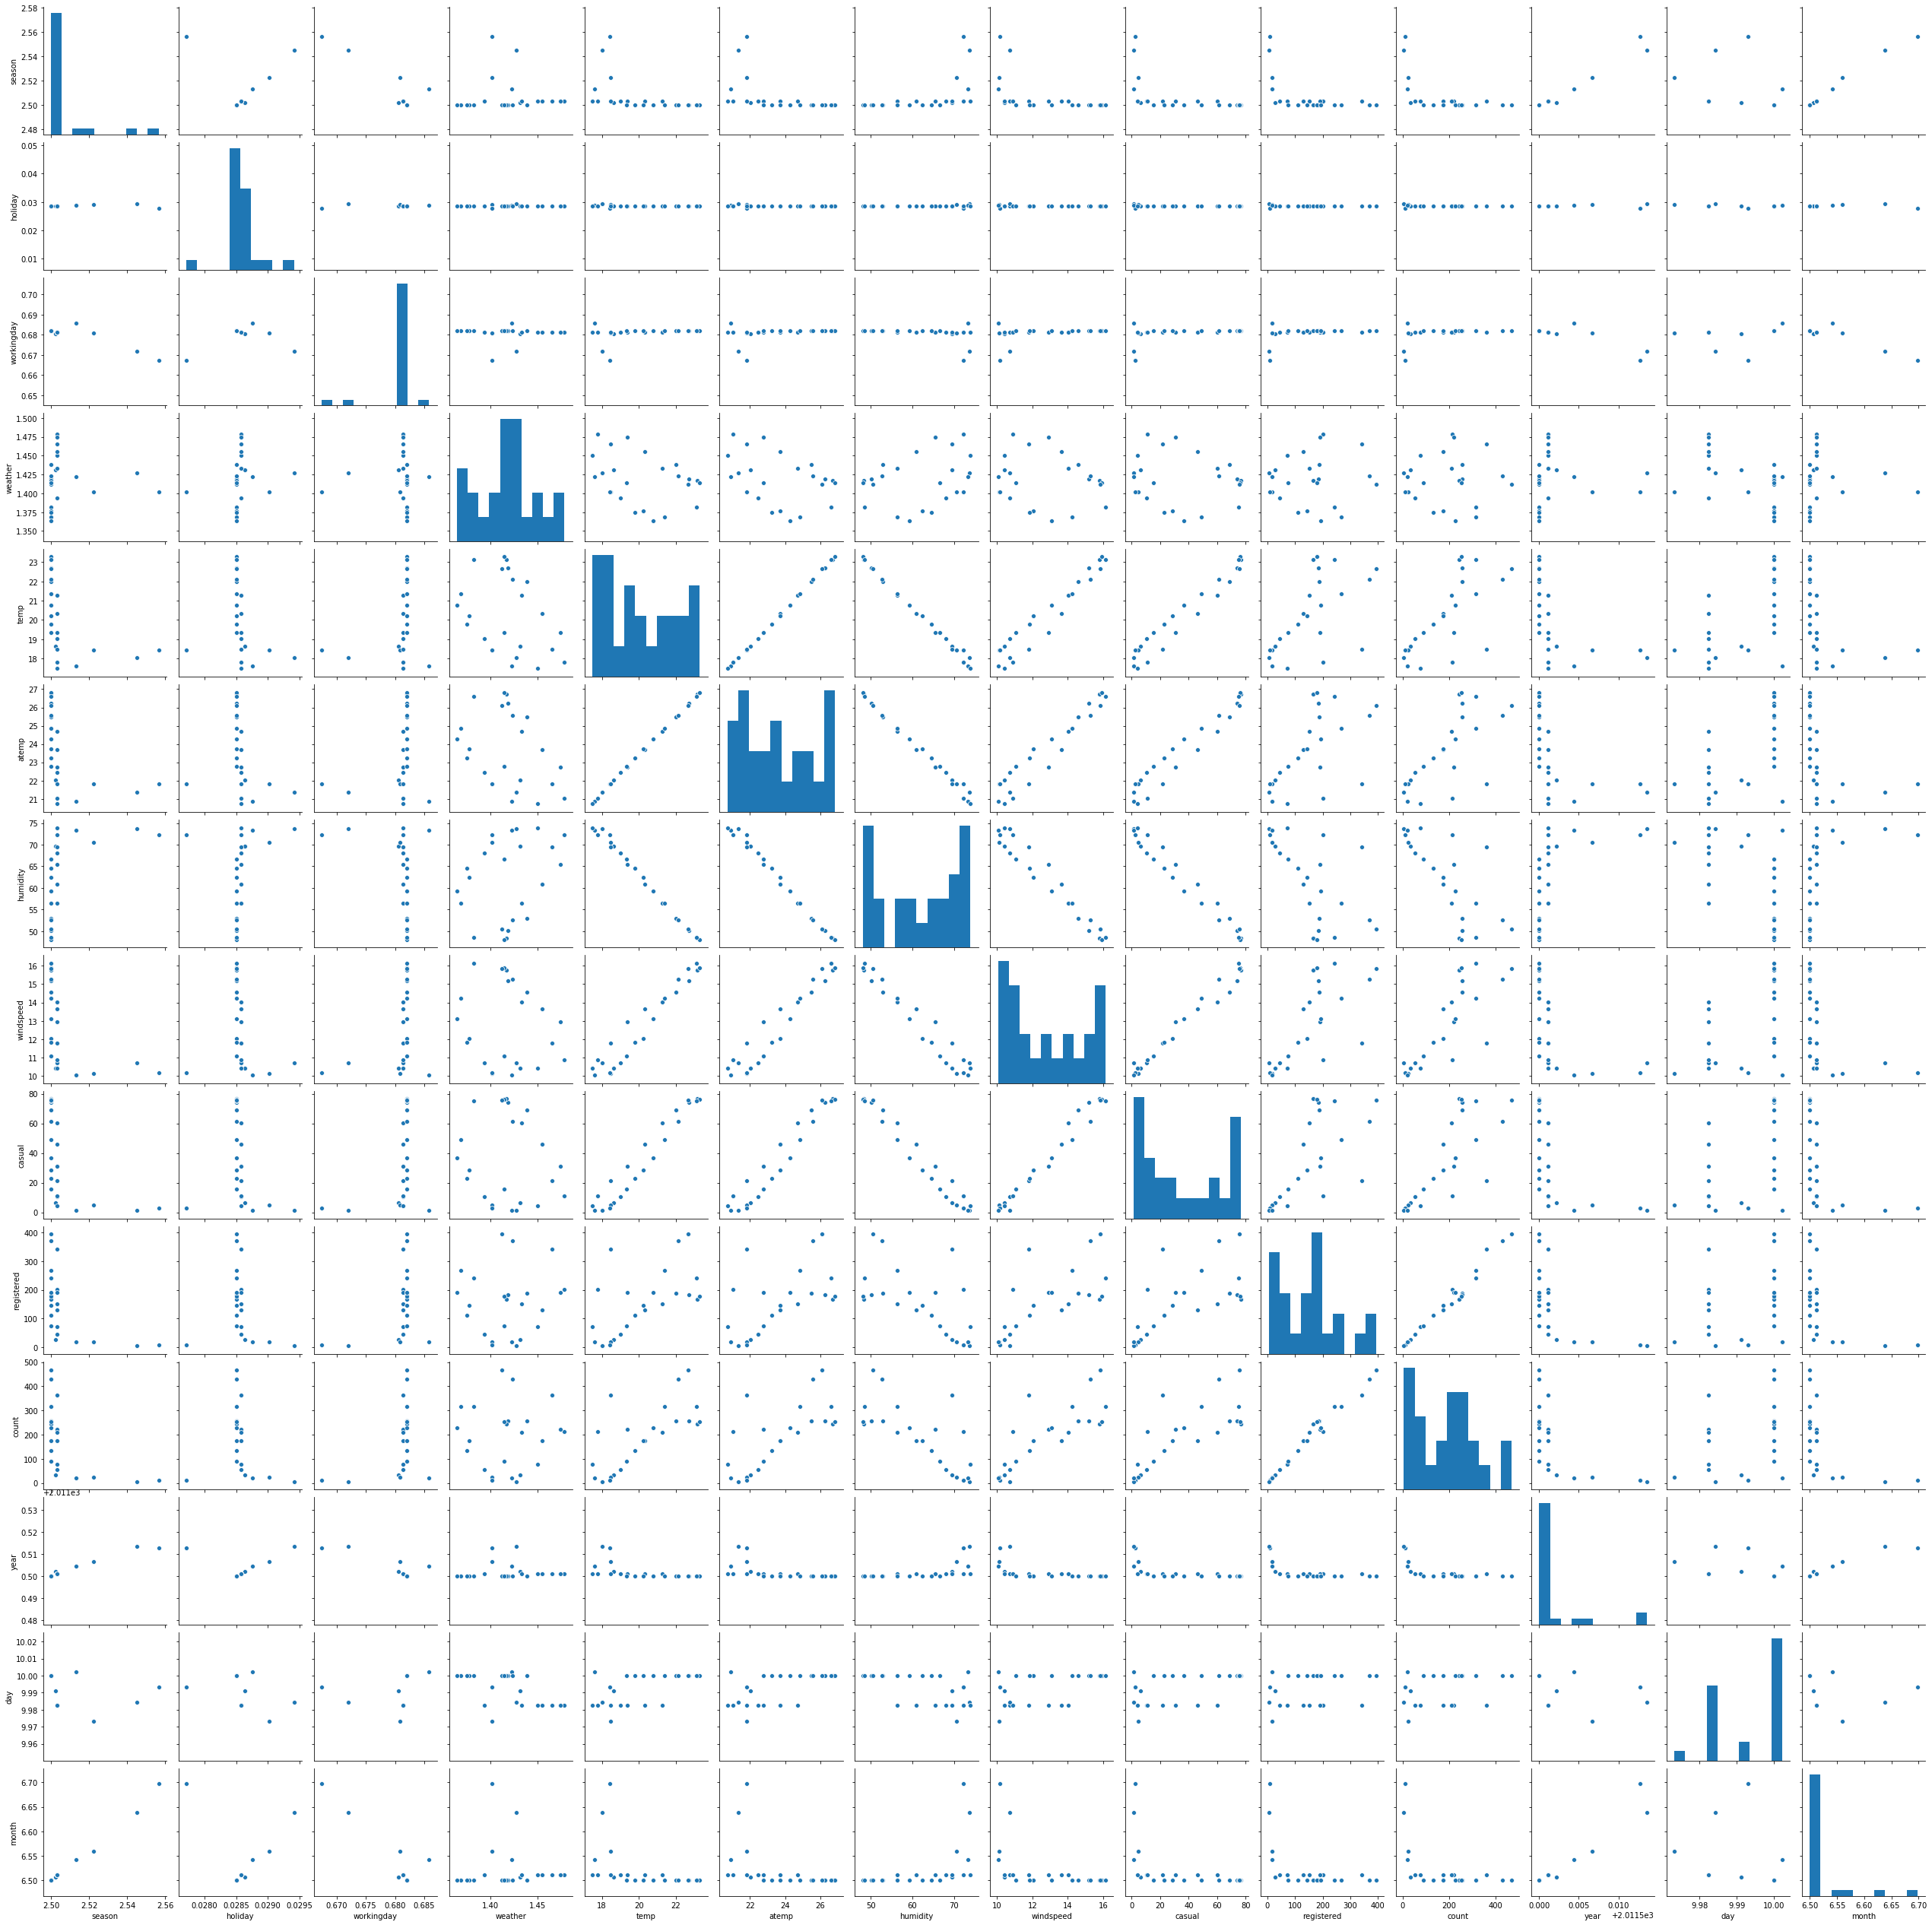

In [205]:
sns.pairplot(df2)

### How much of an impact does weather have on demand?

In [406]:
df4 = df.groupby('weather').mean()
df5 = df4[[('count')]]
df5

,count
weather,
1,205.236791
2,178.955540
3,118.846333
4,164.000000


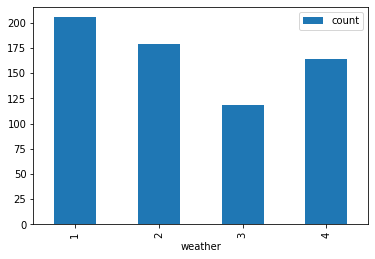

In [381]:
df5.plot.bar()

In [322]:
b = df.corr()[['weather']]
b.loc['count']

#The weather has a relatively low and negative correlation with the number of bikes that have been checked out. 

weather   -0.128655
Name: count, dtype: float64

In [407]:
b.head

<bound method NDFrame.head of              weather
season      0.008879
holiday    -0.007074
workingday  0.033772
weather     1.000000
temp       -0.055035
atemp      -0.055376
humidity    0.406244
windspeed   0.007261
casual     -0.135918
registered -0.109340
count      -0.128655
year       -0.012548
day        -0.007890
hour       -0.022740
month       0.012144>

In [257]:
df5 = df.groupby('year').mean()

In [251]:
df5

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month
year,,,,,,,,,,,,,,
2011,2.511988,0.026558,0.682036,1.426411,19.751988,23.157086,63.405017,12.924144,28.73792,115.485430,144.223349,9.982663,11.571007,6.538547
2012,2.501281,0.030564,0.679722,1.410505,20.706051,24.149254,60.379575,12.675605,43.25000,195.310944,238.560944,10.002379,11.512445,6.504575


In [128]:
type(a)

pandas.core.series.Series

### How does the behavior of casual users differ from subscribers?

In [334]:
df6 = df.groupby('datetime').sum()

In [338]:
df6.reset_index(inplace = True)

In [347]:
df6[('datetime')]=pd.to_datetime(df6['datetime'])

In [307]:
df6.shape

(456, 15)

In [348]:
df6.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour,month
0,2011-01-01,24,0,0,38,338.66,436.350,1934,257.9969,331,654,985,48264,24,276,24
1,2011-01-02,23,0,0,45,342.76,406.800,1601,382.9988,131,670,801,46253,46,271,23
2,2011-01-03,22,0,22,22,177.12,208.345,962,366.0076,120,1229,1349,44242,66,271,22
3,2011-01-04,23,0,23,24,188.60,243.940,1358,247.0156,108,1454,1562,46253,92,273,23
4,2011-01-05,23,0,23,23,214.02,263.660,1005,288.0129,82,1518,1600,46253,115,273,23


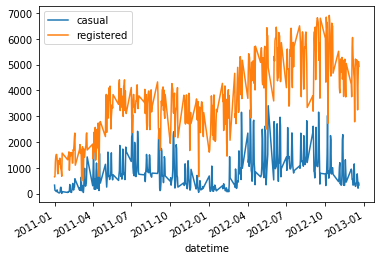

In [350]:
df6.plot(y=['casual','registered'], x='datetime')


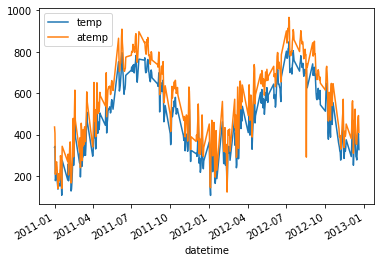

In [396]:
df6.plot(y=['temp','atemp'], x='datetime')

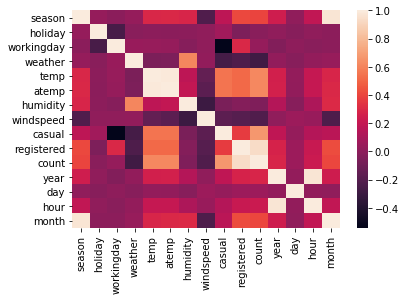

In [399]:
sns.heatmap(df6.corr())

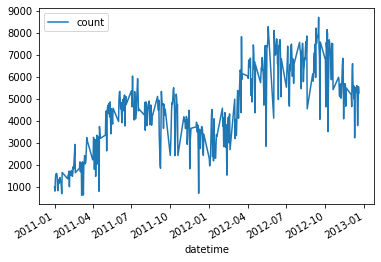

In [357]:
df6.plot(x='datetime',y='count')

### Analisis season / holiday / working_day

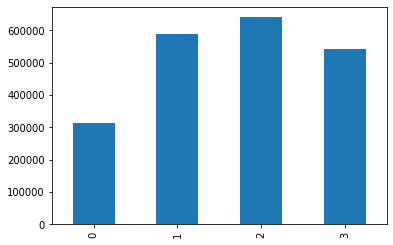

In [379]:
df7 = df.groupby('season').sum()
df7.reset_index(inplace = True)
df7 = df7['count']
df7.plot.bar()

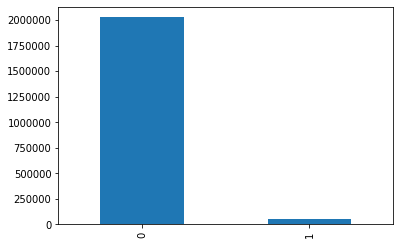

In [376]:
df7 = df.groupby('holiday').sum()
df7.reset_index(inplace = True)
df7 = df7['count']
df7.plot.bar()

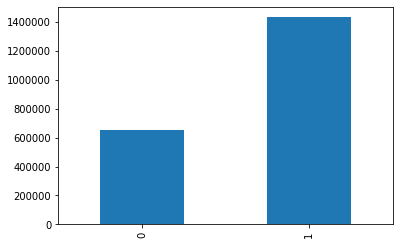

In [378]:
df7 = df.groupby('workingday').sum()
df7.reset_index(inplace = True)
df7 = df7['count']
df7.plot.bar()

### Model&Predictions

In [434]:
X=df[['month','day']]

In [433]:
y=df[['count']]

In [293]:
from statsmodels.regression.linear_model import OLS

In [420]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [421]:
lm = LinearRegression().fit(Xtrain, ytrain)

In [423]:
lm.coef_

array([[8.76241258, 0.57270458]])

In [ ]:
lm.predict(Xtrain)

In [ ]:
def plot_results(ypred, y_true, x):
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y_true, color='b')
    plt.scatter(x, ypred, color='r')
    plt.show()

In [430]:
y_pred.shape

(2722, 1)